In [2]:
!pip install wandb 

import wandb

In [3]:
wandb.login(key='ed57c3903aa24b40dc30a68b77aad62d1489535b')

wandb: Currently logged in as: samruddhipatil2526. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\samruddhi\.netrc


True

In [4]:
sweep_config = {
    'method': 'grid',
    'name' : 'sweep cross entropy',
    'metric': {
      'name': 'val_accuracy',
      'goal': 'maximize'
    },
    'parameters': {
        'epochs': {
            'values': [5,10]
        },
         'hidden_size':{
            'values':[32,64,128]
        },
        'activation': {
            'values': ['sigmoid','relu']
        },
        'loss': {
            'values': ['cross_entropy']
        },


    }
}

sweep_id = wandb.sweep(sweep=sweep_config, project='DL_01)')

Create sweep with ID: 53pj0pnn
Sweep URL: https://wandb.ai/samruddhipatil2526/DL_01%29/sweeps/53pj0pnn


In [1]:
import tensorflow as tf

In [28]:
from numpy import exp

In [5]:
from tensorflow import keras

In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
fashion_mnist = keras.datasets.fashion_mnist

In [8]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
class_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

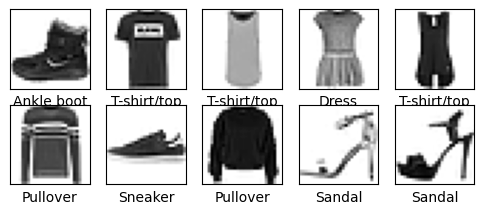

In [9]:
plt.figure(figsize=(6,6))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [10]:
#normalizing data
x_train = x_train/255
x_test = x_test/255

In [11]:
model = tf.keras.Sequential([
    # Convert the 28x28 image into a flat vector of 28x28 = 784 values
    tf.keras.layers.Flatten(input_shape=(28, 28), name='flatten_input'),  
    # Create a "hidden" layer with 256 neurons and apply the ReLU non-linearity
    tf.keras.layers.Dense(256, activation=tf.nn.relu, name='input_to_hidden1'),  
    # Create another hidden layer with 128 neurons
    tf.keras.layers.Dense(128, activation=tf.nn.relu, name='hidden1_to_hidden2'),
    # Create an "output layer" with 10 neurons
    tf.keras.layers.Dense(10, name='hidden_to_logits'),  
])

In [12]:
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_input (Flatten)     (None, 784)               0         
                                                                 
 input_to_hidden1 (Dense)    (None, 256)               200960    
                                                                 
 hidden1_to_hidden2 (Dense)  (None, 128)               32896     
                                                                 
 hidden_to_logits (Dense)    (None, 10)                1290      
                                                                 
Total params: 235146 (918.54 KB)
Trainable params: 235146 (918.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
Hidden_layer_dimensions = [256,128,64]

In [14]:
(train_x_orig,train_y),(test_x_orig,test_y)= fashion_mnist.load_data()
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]
train_y = train_y.reshape(1, len(train_y))
test_y = test_y.reshape(1, len(test_y))
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T
no_of_class=len(np.unique(train_y))

train_x = train_x_flatten/255
test_x = test_x_flatten/255
#layers_dims = [len(train_x),256,128,no_of_class]
onehot_encoded = list()


In [15]:
for i in range(train_y.shape[1]):
    c=train_y[:,i][0]
    letter = [0 for _ in range(no_of_class)]
    letter[c] = 1
    onehot_encoded.append(letter)

In [17]:
Y=np.array(onehot_encoded)
num_features = train_x.shape[0]
layers_dims = [num_features] + Hidden_layer_dimensions +[no_of_class]
#layers_dims = [num_features,256,128,no_of_class]


In [18]:
# Function: initialize_parameters_ 
# used for initialising the parameters of feed forward network
# Returns parameters
def initialize_parameters_(layer_dims):
   
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.01
        parameters['b' + str(l)] =  np.zeros((layer_dims[l], 1))
       
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

       
    return parameters


In [19]:
# Function: feed_forward
# performs the feed forward    
#returns post activation(Z), pre activation (cache) values 
def feed_forward(A, W, b):
   
    Z = np.dot(W, A) + b
    cache = (A, W, b)
    return Z, cache


In [20]:
#function: sigmoid
#performs the sigmoid activation function

def sigmoid(Z):
   
    A = 1/(1+np.exp(-Z))
    cache = Z
    return A, cache

In [21]:
#performs the ReLu activation function
def relu(Z):    
    A = np.maximum(0,Z)
    cache = Z 
    return A, cache

def softmax(Z):
   
    A = exp(Z)/exp(Z).sum()
    cache = Z
    return A, cache

In [22]:
#function: activation_forward
#calls the feed forward and sigmoid or Relu activation functions
#called from 
def activation_forward(A_prev, W, b, activation):
    if activation == "sigmoid":

        Z, linear_cache  = feed_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
   
    elif activation == "relu":
        Z, linear_cache = feed_forward(A_prev, W, b)
        A, activation_cache = relu(Z)

    cache = (linear_cache, activation_cache)
    return A, cache

In [25]:
#Function : L_model_forward
# Will perform forward propagation 

def L_model_forward(X, parameters):
   
    caches = []
    A = X
    L = len(parameters) // 2 
   
    for l in range(1, L):
        A_prev = A
        A, cache = activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = "sigmoid")
        caches.append(cache)
          
    AL, cache = activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation = "sigmoid")
    caches.append(cache)
    AP=[]
    for i in range(AL.shape[1]):
         AA,cache = softmax(AL[:,i])
         AP.append(AA) 

    return AL, caches,AP

In [29]:
#Function : L_layer_model
#Will intialize parameters by calling initialize_parameters_
#Calls L_model_forward to perform feed forward

def L_layer_model(X, Y, layers_dims):
   
    parameters = initialize_parameters_(layers_dims)
    AL, caches,AA = L_model_forward(X, parameters)
    return parameters,caches,AL,AA

parameters,caches,AL,output_probability = L_layer_model(test_x, test_y, layers_dims)
print(output_probability[0])


[0.10165276 0.10039974 0.0996732  0.10058668 0.09975049 0.10017424
 0.09852119 0.09991997 0.09952637 0.09979535]
